In [48]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from pandas import Series, DataFrame
% matplotlib inline

In [49]:
# Load the dataset from the sklearn library
boston_housing = datasets.load_boston()
# Store the input features and target_features
input_features = boston_housing.data
target_features = boston_housing.target.reshape(506,1)
# print the description of data
print(boston_housing.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [50]:
# Let's take a look at the shape of the data
print('shape of the input features:', input_features.shape)
print('shape fo the target features:', target_features.shape)

('shape of the input features:', (506, 13))
('shape fo the target features:', (506, 1))


## Linear Regression
We will start by only looking at one input feature and we will fit a linear line to our data. We will attempt to fit our input data (x) to the output (y). It will fit this line by attempting to minimize the least squared error.

<b>Model:</b>

$$y = w_0 + w_1x$$

<b>Minimizing Least Sqaured error:</b>

$$E(w) = \frac{1}{2}\sum_{n=1}^{N}(y(x_n,w) - t_n)^2 $$

In [51]:
# Seperate into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_features, target_features, test_size=0.33, random_state=42)

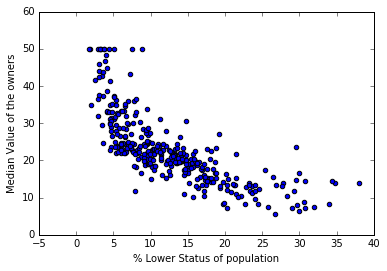

In [52]:
# Extract the features of interest (the 12th column)
training_features = X_train[:,12].reshape(339,1)
testing_features = X_test[:,12].reshape(167,1)

# Let's take a quick look at the data we
plt.scatter(training_features, y_train)
plt.xlabel('% Lower Status of population')
plt.ylabel('Median Value of the owners')

0.49245729146


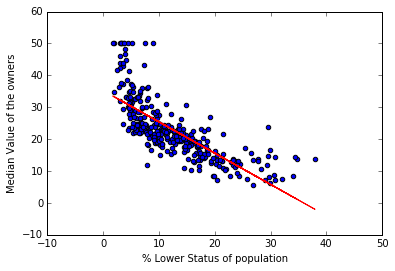

In [53]:
# import our LinearRegression function from sklearn
from sklearn.linear_model import LinearRegression

# Create the linear regression object
reg = LinearRegression()
reg.fit(training_features, y_train)

# Lets compare the linear model
predictions = reg.predict(training_features)
plt.plot(training_features, predictions, 'r')

# Let's take a quick look at the data we
plt.scatter(training_features, y_train)
plt.xlabel('% Lower Status of population')
plt.ylabel('Median Value of the owners')

# Let's take a look at the R^2 score
print(reg.score(testing_features, y_test))

## Polynomial regression
We will still use linear models but we replace the x's with basis functions $\phi(x)$

$y = w_0x_0 + w_1x_1 + ... + w_nx_n$

$y = w_0\phi(x_0) + w_1\phi(x_1) + ... + w_n\phi(x_n)$

In our case we will use a polynomial function ie.

$\phi(x) = x^n$



0.594749976969


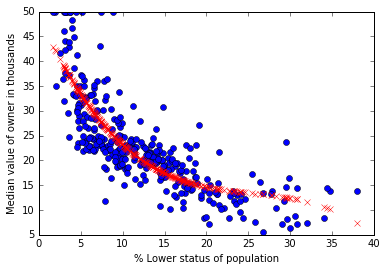

In [54]:
# Create a polynomial model of the data
from sklearn.preprocessing import PolynomialFeatures

# use the built in polynomial features in sci kit learn to create our basis functions
poly = PolynomialFeatures(degree=3)
training_features3 = poly.fit_transform(training_features)
testing_features3 = poly.fit_transform(testing_features)

# Create an instance of the linear regression class
reg = LinearRegression()
reg.fit(training_features3, y_train)

# Predict on the training features
predictions = reg.predict(training_features3)

# Plot the fit
plt.plot(training_features, y_train,'bo', training_features, predictions, 'rx')
plt.xlabel('% Lower status of population')
plt.ylabel('Median value of owner in thousands')
print(reg.score(testing_features3, y_test))

## Multivariate regression
To expand the versatility of our model, we can add more input features. Let's try all of the input features

In [56]:
# Create the linear regression object
reg = LinearRegression()
reg.fit(X_train, y_train)

# Let's take a look at the R^2 score
print(reg.score(X_test, y_test))

0.725851581823
